In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [ ]:
data = pd.read_csv ('/content/Telecom Churn.csv')
data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...    total eve calls  total eve charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

## Univariate Viz

### Histogram

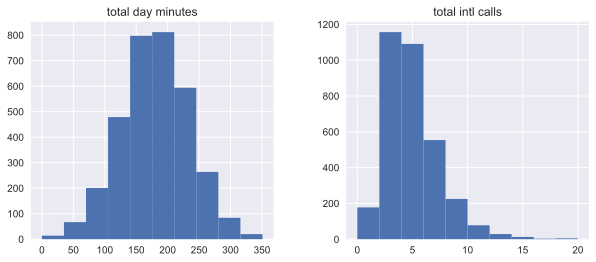

In [ ]:
features = ['total day minutes', 'total intl calls']
data[features].hist(figsize=(10, 4));

In [ ]:
data['total night calls'].hist(figsize=(10,4))

### Density Plots
#### They Do not depend on the bin size to plot as in the case of histograms

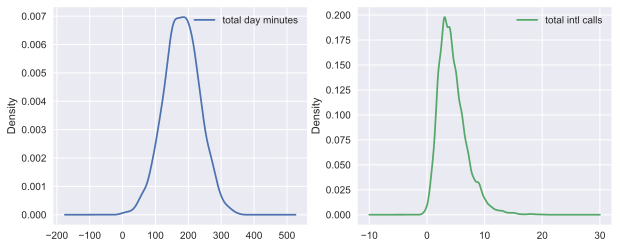

In [ ]:
data[features].plot(kind='density', subplots=True, layout=(1, 2),
                  sharex=False, figsize=(10, 4));

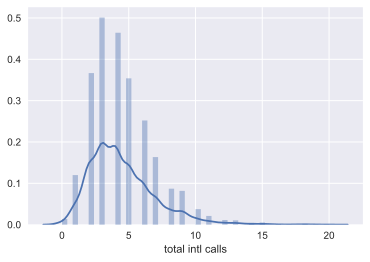

In [ ]:
sns.distplot(data['total intl calls']);
# The bar graphs here indicate the density rather than the total values

### Boxplot

In [ ]:
sns.boxplot(data=data['total intl calls']);

### Voilin Plot

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=data['total intl calls'], ax=axes[0]);
sns.violinplot(data=data['total intl calls'], ax=axes[1]);

### Bar Graph

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='churn', data=data, ax=axes[0]);
sns.countplot(x='customer service calls', data=data, ax=axes[1]);

## Multivariate Viz

#### Qiantitative-Quantitative

### Correlation Matrix

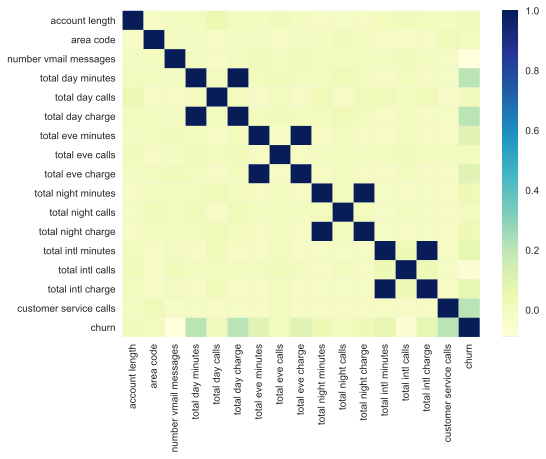

In [ ]:
# Drop non-numerical variables
numerical = list(set(data.columns) -
                 set(['state', 'international plan', 'voice mail plan',
                      'area code', 'churn', 'customer service calls']))

# Calculate and plot
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix);


corr = data.corr()
plt.figure(figsize = (8,6))
ax = sns.heatmap(corr, cmap="YlGnBu")

In [ ]:
# Getting rid of the variables which are not contributing as they have been directly calculted using other variables
numerical = list(set(numerical) -
                 set(['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'phone number']))

In [ ]:
corr_matrix2 = data[numerical].corr()
sns.heatmap(corr_matrix2,  cmap="YlGnBu");

### Scatterplot

In [ ]:
plt.scatter(data['total day minutes'], data['total night minutes']);

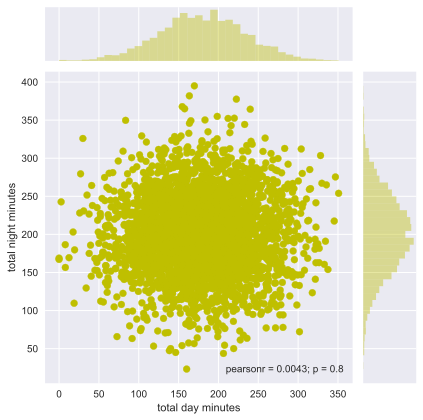

In [ ]:
#scatterplot with BAR Graph for distribution
sns.jointplot(x='total day minutes', y='total night minutes', data=data, kind='scatter', color="y");

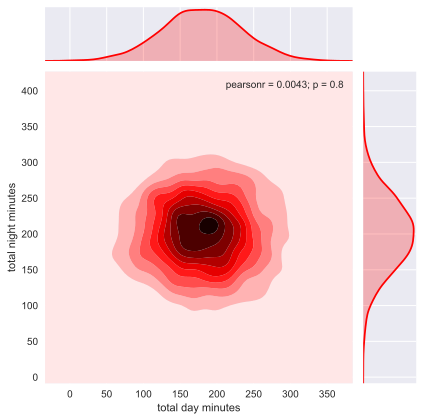

In [ ]:
# Smoothed Version
sns.jointplot('total day minutes', 'total night minutes', data=data, kind="kde", color="r");

### Scatterplot matrix

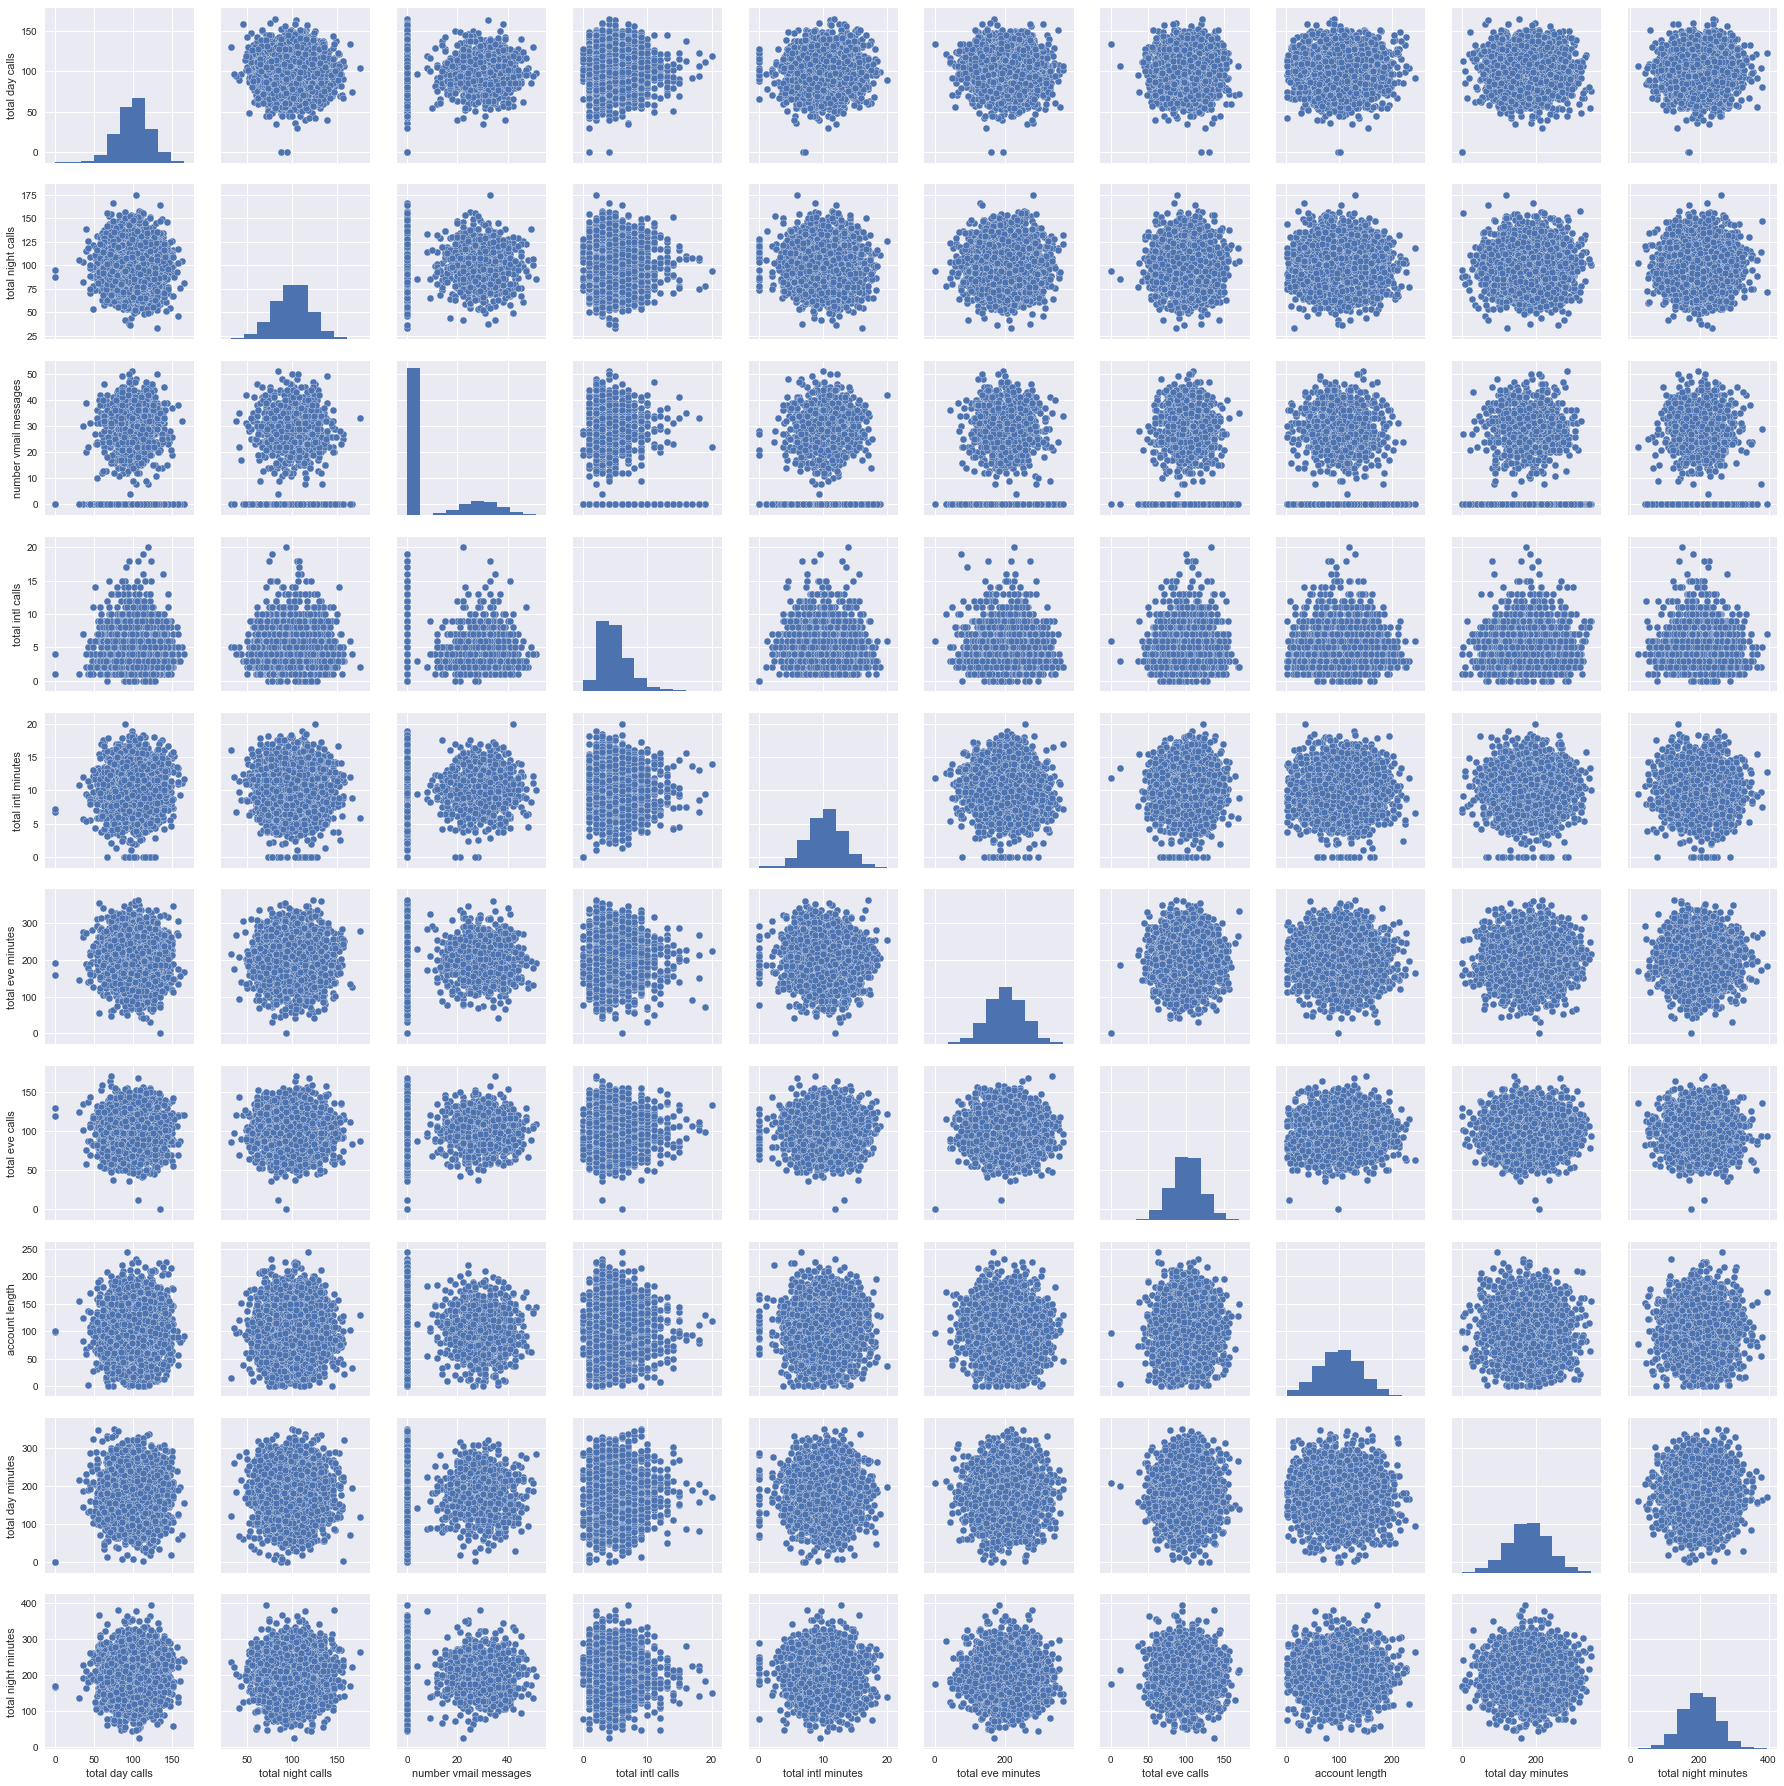

In [ ]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(data[numerical]);

In [ ]:
%config InlineBackend.figure_format = 'svg'

#### Quantitative-Categorical

In [ ]:
# adding color to act as a differentiator
sns.lmplot('total day minutes', 'total night minutes', data=data, hue='churn', fit_reg=False);

A proportion of the customers leaving appear to be concenterated towards top right. They are spending more time during the day and night

In [ ]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='churn', y=feat, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

Discrepancy can be observed in data for no of voicemail messages, total day minutes, and customer service calls

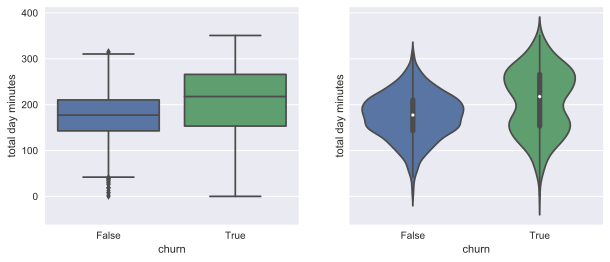

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='churn', y='total day minutes', data=data, ax=axes[0]);
sns.violinplot(x='churn', y='total day minutes', data=data, ax=axes[1]);

In [ ]:
>>> import seaborn as sns


In [ ]:
sns.catplot(x='churn', y='total day minutes', col='customer service calls',
               data=data[data['customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

AttributeError: module 'seaborn' has no attribute 'catplot'

In [ ]:
sns.countplot(x='customer service calls', hue='churn', data=data);

Significant increase in the churn rate can be observed after 4th customer service call

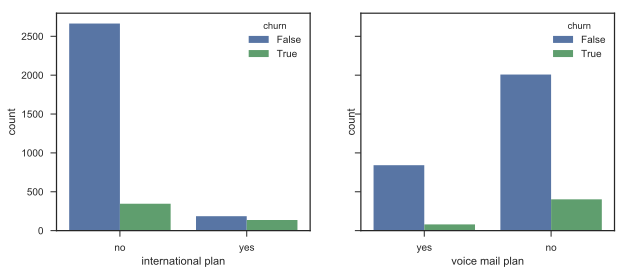

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='international plan', hue='churn', data=data, ax=axes[0]);
sns.countplot(x='voice mail plan', hue='churn', data=data, ax=axes[1]);

The churn rate appears to be much higher for the people opting for international plan.

In [ ]:
pd.crosstab(data['state'], data['churn']).T

state  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL ...  SD  TN  TX  UT  VA  VT  WA  \
churn                                         ...                               
False  49  72  44  60  25  57  62  49  52  55 ...  52  48  54  62  72  65  52   
True    3   8  11   4   9   9  12   5   9   8 ...   8   5  18  10   5   8  14   

state  WI  WV  WY  
churn              
False  71  96  68  
True    7  10   9  

[2 rows x 51 columns]

In [ ]:
data.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

state        NV        WA        ME    ...           RI        WI        IL  \
mean   0.212121  0.212121  0.209677    ...     0.092308  0.089744  0.086207   

state        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

 ### Using t-distributed Stohastic Neighbor Embedding to reduce dimentionality

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data.drop(['churn', 'state', 'phone number'], axis=1)
X['international plan'] = X['international plan'].map({'yes': 1, 'no': 0})
X['voice mail plan'] = X['voice mail plan'].map({'yes': 1, 'no': 0})

Removing the churn, state and, phone number column and converting international plan and voice mail plan to numerical.

Standardizing by subtracting the mean from each variable and dividing it by its standard deviation using StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

Wall time: 1min 14s


In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=data['churn'].map({False: 'blue', True: 'orange'}), alpha=.5);

# The churn data appears to be concentrated in few areas

Further substantiating the data based on international plan and voice mail plan

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['international plan', 'voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
                    c=data[name].map({'yes': 'orange', 'no': 'blue'}), alpha=.5);
    axes[i].set_title(name);

Using the three graphs we can conclude that a large portion of the churning customers lie in the south west corner, the ones with an international plan but no voice mail plan.